Кириленко Елена

# Задача 1

$H_0 : \lambda = \lambda_0 \; vs \; H_1 : \lambda \ne \lambda_0$

Для начала найдем ОМП для $\lambda$ : <br>
$$L(\lambda) = \frac{\lambda^{\sum X_i}}{X_1 ! ... X_n !} e^{-n\lambda}$$ <br>
$$l(\lambda) = {\sum X_i} ln{\lambda} - \sum{ln{X_1 !}} - -n\lambda \rightarrow max$$ <br>
$$\frac{\partial l(\lambda)}{\partial \lambda} = \frac{{\sum X_i}}{\lambda} - n = 0$$ <br>
$$\Rightarrow \lambda^* = \overline X$$

ОМП является асимптотически нормальной оценкой с асимптотической дисперсией $\frac{1}{i(\lambda)}$, где $i(\lambda)$ - информация Фишера в одном наблюдении.

Найдем $I(\lambda)$ : 
$$I(\lambda) = D_{\lambda}(\frac{\partial l(\lambda)}{\partial \lambda}) = D_{\lambda} ( \frac{{\sum X_i}}{\lambda} - 1) = \frac{1}{\lambda^2}\sum{D_{\lambda}(X_i)} = \frac{\lambda n}{\lambda^2} = \frac{n}{\lambda}$$
$$\Rightarrow i(\lambda) =  \frac{1}{\lambda}$$

По определению асимптотической нормальности получаем: <br>
$$\sqrt{n}(\lambda^* - \lambda) \xrightarrow{\text{d}} N(0, \lambda)$$
То есть примерно $$\frac{\sqrt{n}(\lambda^* - \lambda)}{\sqrt{\lambda}} \sim N(0,1)$$
То есть при верности $H_0$ : $$\frac{\sqrt{n}(\overline X - \lambda_0)}{\sqrt{\lambda_0}} \sim N(0,1)$$
Отсюда получаем критерий : <br>
если $$|\frac{\sqrt{n}(\overline X - \lambda_0)}{\sqrt{\lambda_0}}| > u_{1 - \frac{\alpha}{2}}$$
то $H_0$ отвергается   (где $u_{1 - \frac{\alpha}{2}}$ - квантиль стандартного нормального)

(Только сейчас поняла, что можно же было и просто ЦПТ воспользоваться, было бы в разы короче)

In [60]:
import scipy.stats as sps
import numpy as np

lambd = 1
n = 20
alpha = 0.05
count_rejected = 0
count = 1000
for i in range(count):
    sample = sps.poisson(mu=lambd).rvs(size=n)
    u = sps.norm.ppf(1 - alpha / 2)
    reject = (np.sqrt(n) * (sample.mean() - lambd) / np.sqrt(lambd)) > u
    count_rejected += int(reject)
print('Доля ошибок первого рода = ', count_rejected / count)

Доля ошибок первого рода =  0.043


Видим, что ошибка первого рода примерно равна $\alpha= 0.05$

# Задача 2

## 1)
$$h_t = \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}$$

a) L - оператор сдвига : $L{y_t} = y_{t - 1}$ , $L{\epsilon_t} = \epsilon_{t - 1}$ <br>
 То есть получим : <br>
 $a(L)h_t = b(L)\epsilon_t$, где $b(L) = 1 - 1.3L + 0.4L^2, \;\; a(L) = 1$
 
b) Проверим на стационарность (в широком смысле).  <br>
 $E(h_t^2) < \infty$ <br>
 $E(h_t) = 0 = const$ <br>
 $cov(h_t, h_s) = cov(\epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; \epsilon_s - 1.3 \epsilon_{s- 1} + 0.4 \epsilon_{s-2})= 0.4 I(s - t = 2) + 0.65 I (s - t = 1) + 2.85 I(s = t) = cov(h_{t + d}, h_{s + d})$ <br>
 
$\Rightarrow$ процесс является стационарным (в широком смысле)

d) $$D(h_t) = cov(h_t, h_t) = cov(\epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}) =$$
$$ = cov(\epsilon_t, \epsilon_t) + (1.3)^2 cov(\epsilon_{t -1}, \epsilon_{t-1}) + 0.4^2 cov(\epsilon_{t -2}, \epsilon_{t-2}) = 1 + (1.3)^2 + 0.4^2 = 2.85$$

c) $$\rho_0 = corr(h_t, h_t) = \frac{cov(h_t, h_t)}{D(h_t)} = 1$$

$$\rho_1 = corr(h_t, h_{t + 1}) = \frac{cov(h_t, h_{t + 1})}{D(h_t)} = \frac{1.3 cov(\epsilon_t, \epsilon_t) - 1.3 * 0.4 cov(\epsilon_{t - 1}, \epsilon_{t - 1})}{2.85} = \frac{1.82}{2.85} = \frac{182}{285} $$

$$\rho_2 = corr(h_t, h_{t + 2}) = \frac{cov(h_t, h_{t + 2})}{D(h_t)} = \frac{cov(\epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; \epsilon_{t + 2} - 1.3 \epsilon_{t+ 1} + 0.4 \epsilon_{t})}{D(h_t)} = \frac{0.4 cov(\epsilon_t, \epsilon_t)}{D(h_t)} = \frac{0.4}{2.85} = \frac{40}{285}$$

$$\rho_3 = corr(h_t, h_{t + 3}) = \frac{cov(h_t, h_{t + 3})}{D(h_t)} = \frac{cov(\epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; \epsilon_{t + 3} - 1.3 \epsilon_{t+ 2} + 0.4 \epsilon_{t + 1})}{D(h_t)} = 0$$

e) По определению процесса получаем $p = 0, q = 2$, то есть  ARMA(0, 2) <br>

f, g) Данный процесс не является процессом авторегрессии, а уровнения Юла-Уолкера определяются только для авторегрессионных.

## 2)
$$h_t - 0.5 h_{t - 1} =  \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}$$

a) L - оператор сдвига : $L{y_t} = y_{t - 1}$ , $L{\epsilon_t} = \epsilon_{t - 1}$ <br>
 То есть получим : <br>
 $a(L)h_t = b(L)\epsilon_t$, где $b(L) = 1 - 1.3L + 0.4L^2$, $\;\;a(L) = 1 - 0.5L$
 
b) Проверим на стационарность. 

Воспользуемся следующим утверждением : <br>
Временной ряд является стационарным в широком смысле $\Leftrightarrow$ все корни(комплексные) уравнения a(z) = 0 лежат вне единичного круга. <br>
В нашем случае 
$$a(z) = 1 - 0.5z = 0 \Rightarrow z = 2 - \text{лежит вне единичного круга}$$
$\Rightarrow$ процесс стационарен

d) Сначала посчитаем ковариации с $\epsilon$

$$c_0 = cov(h_t, \epsilon_t) = cov(0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; \epsilon_t) = cov(\epsilon_t, \epsilon_t) = 1$$

$$c_1 = cov(h_t, \epsilon_{t - 1}) = cov(0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; \epsilon_{t-1}) = 0.5 cov(h_{t-1}, \epsilon_{t-1}) - 1.3 = 0.5 - 1.3 = -0.8$$

$$c_2 = cov(h_t, \epsilon_{t - 2}) = cov(0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; \epsilon_{t-2}) = 0.5 cov(h_{t-1}, \epsilon_{t-2}) + 0.4 = -0.4 + 0.4 = 0$$

$$c_3 = cov(h_t, \epsilon_{t - 3}) = 0.5 cov(h_{t-1}, \epsilon_{t - 3}) = 0 = c_4 = ... $$

$$\Rightarrow D(h_t) = cov(h_t, h_t) = cov(0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; 0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}) = $$ 

$$= 0.5^2 cov(h_{t-1}, h_{t-1}) - 2 * 0.5 * 1.3 cov(h_{t-1}, \epsilon_{t-1}) + 2 * 0.5 * 0.4 cov(h_{t-1}, \epsilon_{t-2})+ 1 + 1.3^2 + 0.4^2$$

$$= 0.5^2 D(h_{t-1}) - 1.3 - 0.32 + 2.85 = 0.25 D(h_{t-1}) + 1.23$$
В силу стационарности : 
$$D(h_t) = D(h_{t-1}) \Rightarrow 0.75 D(h_t) = 1.23 \Rightarrow  D(h_t) = \frac{1.23}{0.75} = 1.64$$

c) $$\rho_0 = corr(h_t, h_t) = \frac{cov(h_t, h_t)}{D(h_t)} = 1$$
 Найдем сначала ковариацию: <br>
 
$$cov(h_t, h_{t + 1}) = cov(0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t- 1} + 0.4 \epsilon_{t-2}, \; 0.5 h_{t} + \epsilon_{t + 1} - 1.3 \epsilon_{t} + 0.4 \epsilon_{t-1}) = $$

$$= 0.25 cov(h_{t - 1}, h_{t}) + 0.5*0.4 cov(h_{t-1}, \epsilon_{t-1}) + 0.5 cov(\epsilon_{t}, h_t) - 0.5 * 1.3 cov(\epsilon_{t-1}, h_t) + 0.4*0.5 cov(\epsilon_{t-2}, h_t) - 1.3 - 1.3 * 0.4 = $$

$$= 0.25 cov(h_{t - 1}, h_{t}) + 0.2 + 0.5 + 1.3 * 0.4 - 1.3 - 1.3 * 0.4 = 0.25 cov(h_{t - 1}, h_{t}) - 0.6$$

Так как процесс стационарный, то $cov(h_t, h_{t + 1}) = cov(h_{t - 1}, h_{t})$ <br>
$\Rightarrow cov(h_t, h_{t + 1}) = - \frac{0.6}{0.75} = -0.8$

$$\rho_1 = corr(h_t, h_{t + 1}) = \frac{cov(h_t, h_{t + 1})}{D(h_t)} =  -\frac{0.8}{1.64} = -\frac{20}{41}$$


$$cov(h_t, h_{t + 2}) = cov(0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t - 1} + 0.4 \epsilon_{t-2}, \; 0.5 h_{t + 1} + \epsilon_{t + 2} - 1.3 \epsilon_{t + 1} + 0.4 \epsilon_{t}) = $$

$$= 0.25 cov(h_{t - 1}, h_{t + 1}) + + 0.5 cov(\epsilon_{t}, h_{t+1}) - 1.3 * 0.5 cov(\epsilon_{t-1}, h_{t+1}) + 0.5*0.4 cov(\epsilon_{t-2}, h_{t+1}) + 0.4 = 0.25 cov(h_{t - 1}, h_{t}) - 0.5 * 0.8 + 0.4 = $$ 

$$= 0.25 cov(h_{t - 1}, h_{t}) $$

Так как процесс стационарный, то $cov(h_t, h_{t + 2}) = cov(h_{t - 1}, h_{t + 1})$ <br>
$\Rightarrow cov(h_t, h_{t + 2}) = 0$

$$\rho_2 = corr(h_t, h_{t + 2}) = \frac{cov(h_t, h_{t + 2})}{D(h_t)} = 0 $$


$$cov(h_t, h_{t + 3}) = cov(0.5 h_{t - 1} + \epsilon_t - 1.3 \epsilon_{t - 1} + 0.4 \epsilon_{t-2}, \; 0.5 h_{t + 2} + \epsilon_{t + 3} - 1.3 \epsilon_{t + 2} + 0.4 \epsilon_{t + 1}) = $$
$$= 0.25 cov(h_{t - 1}, h_{t + 2}) $$

Так как процесс стационарный, то $cov(h_t, h_{t + 3}) = cov(h_{t - 1}, h_{t + 2})$ <br>
$\Rightarrow cov(h_t, h_{t + 3}) = 0$

$$\rho_3 = corr(h_t, h_{t + 3}) = \frac{cov(h_t, h_{t + 3})}{D(h_t)} = 0$$

e) По определению процесса получаем $p = 1, q = 2$, то есть  ARMA(1, 2) <br>
f, g) Данный процесс не является процессом авторегрессии, а уровнения Юла-Уолкера определяются только для авторегрессионных.

## 3)
$$h_t − 1.5h_{t−1} + 0.6h_{t−2} = \epsilon_t$$

a) L - оператор сдвига : $L{y_t} = y_{t - 1}$ , $L{\epsilon_t} = \epsilon_{t - 1}$ <br>
 Получим : <br>
 $a(L)h_t = b(L)\epsilon_t$, где $b(L) = 1$, $\;\;a(L) = 1 - 1.5L + 0.6 L^2$
  
b) Опять же воспользуемся утверждением про стационарность (в широком смысле)
$$a(z) = 1 - 1.5z + 0.6 z^2 = 0 \Rightarrow z_{1, 2} = 1.25 \pm 0.322749 i - \text{лежит вне единичного круга}$$
$\Rightarrow$ процесс стационарен (в широком смысле)


c) $$\rho_0 = corr(h_t, h_t) = \frac{cov(h_t, h_t)}{D(h_t)} = 1$$

 $$\rho_1 = corr(h_t, h_{t+1}) = \frac{cov(h_t, h_{t+1})}{cov(h_t, h_t)} = \frac{1.5 cov(h_t, h_t) - 0.6 cov(h_t, h_{t-1})}{cov(h_t, h_t)} = 1.5 - 0.6 \rho_1$$
$$\Rightarrow 1.6 \rho_1 = 1.5 \Rightarrow \rho_1 = \frac{15}{16}$$

 $$\rho_2 = corr(h_t, h_{t+2}) = \frac{cov(h_t, h_{t+2})}{cov(h_t, h_t)} = \frac{1.5 cov(h_t, h_{t+1}) - 0.6 cov(h_t, h_{t})}{cov(h_t, h_t)} = 1.5 \rho_1 - 0.6 = \frac{129}{160}$$
 
 $$\rho_3 =  corr(h_t, h_{t+3}) = \frac{cov(h_t, h_{t+3})}{cov(h_t, h_t)} = \frac{cov(h_t, 1.5 h_{t+2} - 0.6 h_{t+1} + e_{t+3})}{cov(h_t, h_t)} = 1.5 \rho_2 - 0.6 \rho_1 = \frac{103.5}{160}$$




d) Посчитаем дисперсию. Для начала посчитаем ковариацию с $\epsilon$

$$ cov(h_t, \epsilon_t) = cov(1.5 h_{t−1} - 0.6 h_{t−2} + \epsilon_t, \epsilon_t) = 1 $$
 
$$D(h_t) = cov(1.5 h_{t-1} - 0.6 cov(h_{t-2, h_t}) + cov(\epsilon_{t}, h_t)) = 1.5 \rho_1 D(h_t) - 0.6 \rho_2 D(h_t) + cov(\epsilon_t, h_t)$$
$$\Rightarrow D(h_t) = \frac{400}{31}$$

e) По определению процесса получаем $p = 2, q = 0$, то есть  ARMA(2, 0), то есть AR(2) <br>


f) Составим систему уравнений:
Заметим, что мы имеем дело с AR(2) процессом, поэтому система имеет следующий вид:<br>
$\rho_2 = a_1 \rho_1 + a_2 \rho_0$ <br>
$\rho_3 = a_1 \rho_2 + a_2 \rho_1$

g) 
Решая эту систему получим : 
$a_1 = \frac{\rho_3 - \rho_2\rho_1}{\rho_2 - \rho_1} = 1.5$
$a_2 = \rho_2 - a_1 \rho_1 = -0.6$

# Задача 3
$$X_t − 1.5X_{t−1} + 0.7X_{t−2} = u_{t−1} + 0.5u_{t−2} + \epsilon_t − \epsilon_{t−1} + 0.2\epsilon_{t−2}$$

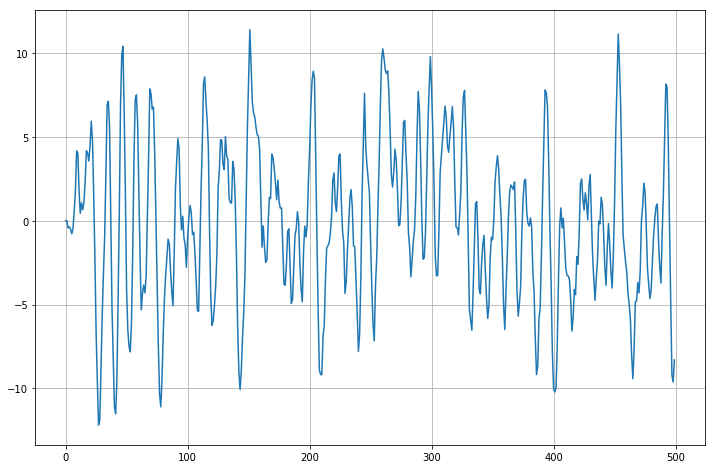

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline


N = 500
u = sps.bernoulli(p=0.5).rvs(size=N)
u[u == 0] = -1
eps = sps.norm(scale=0.5).rvs(size=N)
series = [0, 0]
for i in range(2, N):
    X_i = 1.5 * series[-1] - 0.7 * series[-2] + u[i - 1] + 0.5 * u[i - 2] + eps[i] - eps[i - 1] + 0.2 * eps[i - 2]
    series.append(X_i)

plt.figure(figsize=(12, 8))
plt.plot(np.arange(N), series)
plt.grid()
plt.show()

# Задача 4

In [6]:
import pandas as pd
from datetime import datetime
import random
import seaborn as sns

Сначала немного посмотрим на данные

In [7]:
inventories = pd.read_csv('alchohol_inventories.csv', header=0, sep=',')
sales = pd.read_csv('alchohol_sales.csv', header=0, sep=',')

Посмотрим, есть ли у нас nan-ы

In [8]:
inventories.isnull().values.any(), sales.isnull().values.any()

(False, False)

Нет, хорошо. Нарисуем графики временных рядов

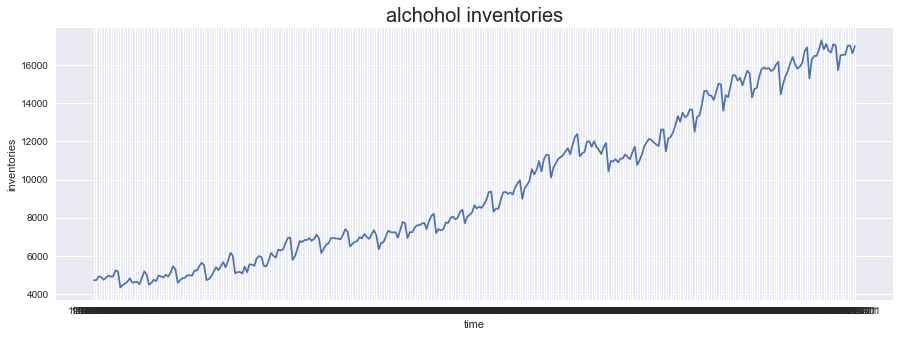

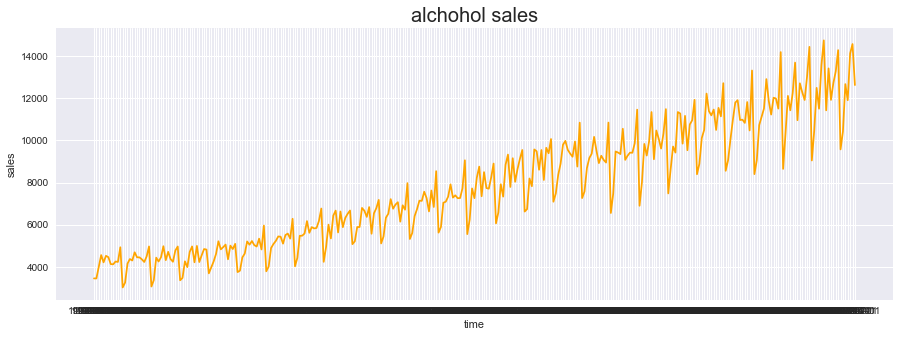

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(inventories['DATE'], inventories['I4248IM144NCEN'])
plt.xlabel('time')
plt.ylabel('inventories')
plt.title('alchohol inventories', fontsize=20)
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(sales['DATE'], sales['S4248SM144NCEN'], c='orange')
plt.title('alchohol sales',  fontsize=20)
plt.xlabel('time')
plt.ylabel('sales')
plt.show()

Видим тренд. Посмотрим на зависимость продаж от запаса. 

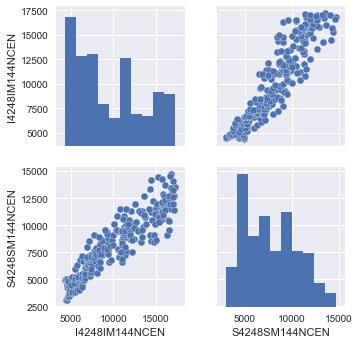

In [92]:
sns.pairplot(pd.concat((inventories['I4248IM144NCEN'], sales['S4248SM144NCEN']), axis=1))

Разделим данные на тест и обучение.

In [13]:
train_inventories = np.array(inventories[:-12]['I4248IM144NCEN'])
test_inventories = np.array(inventories[-12:]['I4248IM144NCEN'])

train_sales = np.array(sales[:-12]['S4248SM144NCEN'])
test_sales = np.array(sales[-12:]['S4248SM144NCEN'])

In [95]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
import statsmodels
import itertools
import statsmodels.api as sm

In [46]:
import warnings
warnings.filterwarnings("ignore")

Напишем функцию для провекри гипотзы о стационарности ряда. В зависимости от аргумента можем проверять либо критерием КПСС, либо Дики-Фуллера.

Заметим, что у КПСС нулевая гипотеза - стационарность, а у Дики-Фуллера - не стационарность

In [159]:
def check_stationarity(series, stat_criterion='kpss'):
    stat_rejected = False
    if stat_criterion == 'kpss':
        result = kpss(series)
        if result[1] < 0.05:
            print('Kpss criterion rejects the hypothesis of stationarity, p-value = {}'.format(result[1]))
            stat_rejected = True
        else:
            print("Kpss criterion doesn't reject the hypothesis of stationarity, p-value = {}".format(result[1]))

    elif stat_criterion == 'adfuller':
        result = adfuller(series)
        if result[1] < 0.05:
            print('Dickey—Fuller criterion rejects the hypothesis of non-stationarity, p-value = {}'.format(result[1]))
        else:
            print("Dickey—Fuller criterion doesn't reject the hypothesis of non-stationarity, p-value = {}".format(result[1]))
            stat_rejected = True
    return stat_rejected

def boxcox_inverted(data_boxcox, lambd):
    if lambd==0:
        return np.exp(data_boxcox)
    return (lambd*data_boxcox + 1) ** (1 / lambd)

Реализуем нужный класс

Метод **make_stationary** приводит ряд к стационарному, находя нужные d и D. Заметим, что мы можем выбирать критерий проверки на стационарность (КППС или Дики-Фуллера), lambda при использовании преобразования Бокса-Кокса (иначе будет выбран оптимальный параметр lambda), период сезонности для сезонного дифференцирования. При этом все преобразования применяются последовательно (Бокс-Кокс -> дифференцирование -> сезонное дифференцирование -> дифференцирование ...) и как только ряд становится стационарным дальнейшие преобразования не производятся. 

Метод **search** производит поиск по параметрам p, q, P, Q, находя оптимальные. В функцию также можно подать критерий по которому будем сравнивать модели с разными параметрами: AIC или BIC.

Метод **fit** обучает модель ARIMA с данными в аргументах параметрами.

Метод **fit_best** обучает модель ARIMA с лучшими параметрами.

Метод **forecast** предсказывает на forecast_steps шагов вперед. При этом если в аргументах задан check_residuals=True и задан test_series (тестовая часть временного ряда), то будет также произведен анализ остатков : проверка гипотезы независимости остатков при помощи критерия Льюнга-Бокса (в аргументе lags можно указать то, на сколько лагов будем смотреть) и проверка остатков на нормальность при помощи критерия Шапиро-Уилка. Также, если задан test_series, то будет выведено mse для получившегося предсказания. При этом будет выведен график предсказаний исходного ряда (при надобности будет произведено обратное преобразование Бокса-Кокса) и график остатков в случае если check_residuals=True.  Возвращает предсказания.
 
Метод **search_fit_forecast** делает все вместе и принимает все перечисленные ранее аргументы.

Методы **analyze_residuals** и **show_metrics** являются вспомогательными для метода forecast

Все методы выводят информацию, чтобы было понятно, что произошло, что отвергнулось, что перебралось и так далее.

In [160]:
class Series:
    def __init__(self, series):
        self.series = series
    
    def make_stationary(self, stat_criterion='kpss', lambd=None, S=12):
        stat_rejected = check_stationarity(self.series, stat_criterion=stat_criterion)
        self.d = 0
        self.D = 0
        self.S = S
        if not stat_rejected:
            return 
    
        self.boxcox = False
        self.series_to_pred = self.series
        
        # variance stabilization
        print('-- Variance stabilization --')
        if lambd is None:
            self.series_boxcox, self.lambd = sps.boxcox(self.series)
        else:
            self.series_boxcox = sps.boxcox(self.series, lmbda=lambd)
            self.lambd = lambd

        stat_rejected = check_stationarity(self.series_boxcox, stat_criterion=stat_criterion)

        if not stat_rejected:
            return
        
        self.boxcox = True
        self.series_to_pred = self.series_boxcox

        # differentiation
        print('-- Differentiation --')
        self.series_ = self.series_boxcox[1:] - self.series_boxcox[:-1]
        stat_rejected = check_stationarity(self.series_, stat_criterion=stat_criterion)
        self.d += 1
        if not stat_rejected:
            return 

        # seasonal differentiation
        print('-- Seasonal differentiation --')
        self.series_ = self.series_[S:] - self.series_[:-S]
        self.D += 1
        if not stat_rejected:
            return

        # differentiation
        print('-- Differentiation --')
        self.series_ = self.series_[1:] - self.series_[:-1]
        stat_rejected = check_stationarity(self.series_, stat_criterion=stat_criterion)
        self.d += 1
        if stat_rejected:
            print('Sorry, try to do it by yourself')
        return
    

    def search(self, p, q, P, Q, S=12, criterion='aic'):
        Q = range(Q)
        q = range(q)
        p = range(1,p)
        P = range(1,P)
        pdq = list(itertools.product(p, [self.d], q))
        seasonal_pdq = [(x[0], x[1], x[2], S) for x in list(itertools.product(P, [self.D], Q))]
        best_criterion = 1e15
        best_params = []
        
        print('-- Start searching --')
        for param in pdq:
            for param_seasonal in seasonal_pdq:
                try:
                    model = sm.tsa.statespace.SARIMAX(self.series_to_pred, order=param, seasonal_order=param_seasonal, 
                                                      enforce_stationarity=False, enforce_invertibility=False)
                    model = model.fit()
                    if criterion=='aic':
                        if not np.isnan(model.aic):
                            print('ARIMA{}x{} – AIC:{}'.format(param, param_seasonal, model.aic))
                            if(model.aic < best_criterion):
                                best_criterion = model.aic
                                best_params = [param, param_seasonal]
                    else:
                        if not np.isnan(model.bic):
                            print('ARIMA{}x{} – BIC:{}'.format(param, param_seasonal, model.bic))
                            if(model.bic < best_criterion):
                                best_criterion = model.bic
                                best_params = [param, param_seasonal]
                except:
                    pass
                
        print('Best params ARIMA{}x{}'.format(best_params[0], best_params[1]))
        self.best_params = best_params
    
    def fit(self, params, seasonal_params):
        self.model = sm.tsa.statespace.SARIMAX(self.series_to_pred, order=params, seasonal_order=seasonal_params, 
                                                  enforce_stationarity=False, enforce_invertibility=False)
        self.model = self.model.fit()
        
    def fit_best(self):
        self.fit(self.best_params[0], self.best_params[1])
        
    def forecast(self, forecast_steps, check_residuals=False, test_series=None, lags=10):
        pred = self.model.get_forecast(steps=forecast_steps)
        pred_ci = pred.conf_int()
        
        length = len(self.series)
        plt.figure(figsize=(15, 7))
        plt.plot(np.arange(0, length), self.series,
                 color='orange',  label='Observed')
        
        if self.boxcox:
            plt.plot(np.arange(length, length  + forecast_steps) , boxcox_inverted(pred.predicted_mean, self.lambd),
                 label='Forecast', color='red')
            plt.fill_between(pred_ci.index + length, boxcox_inverted(pred_ci.iloc[:, 0], self.lambd),
                             boxcox_inverted(pred_ci.iloc[:, 1], self.lambd), color='gray', alpha=.2)
            self.prediction = boxcox_inverted(pred.predicted_mean, self.lambd)
                        
        else:
                     
            plt.plot(np.arange(length, length+forecast_steps) , pred_uc.predicted_mean, 
                     label='Forecast', color='red')
            plt.fill_between(pred_ci.index + length, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                             color='gray', alpha=.2)
            self.prediction = pred

        plt.title('Forecast', fontsize=15)
        plt.legend()
        plt.show()
        
        if check_residuals and test_series is not None and len(test_series) == len(self.prediction):
            self.analyze_residuals(test_series, self.prediction, lags=lags)
        if test_series is not None and len(test_series) == len(self.prediction):
            self.show_metrics(test_series, self.prediction)
            
        return self.prediction
        
    def analyze_residuals(self, series_part, pred_part, lags=10):
        residuals = series_part - pred_part
        plt.figure(figsize=(13, 4))
        plt.plot(np.arange(len(residuals)), residuals)
        plt.title('residuals')
        plt.show()
        ljungbox = statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=min(lags, len(residuals)))[1]
        if (ljungbox < 0.05).any():
            print('Hypothesis of independency of residuals is rejected')
        else:
            print("Hypothesis of independency of residuals isn't rejected")
            
        shapiro_wilk = sps.shapiro(residuals)[1]
        if shapiro_wilk < 0.05:
            print('Hypothesis of normality of residuals is rejected')
        else:
            print("Hypothesis of normality of residuals isn't rejected")
        
        
    def show_metrics(self, series_part, pred_part):
        mse = ((pred_part - series_part) ** 2).mean()
        print('Mse on test part = {}'.format(mse))
        
        
    def search_fit_forecast(self, stat_criterion='kpss', lambd=None, p=3, q=3, P=3, Q=3, S=12, 
                            criterion='aic', forecast_steps=12, 
                            check_residuals=False, test_series=None): 
        
        self.make_stationary(stat_criterion=stat_criterion, lambd=lambd, S=S)
        self.search(p=p, q=q, P=P, Q=Q, S=S, criterion=criterion)
        self.fit_best()
        pred = self.forecast(forecast_steps, check_residuals=check_residuals, test_series=test_series)
        return pred
    

Предскажем временной ряд для запасов алкоголя. <br>

Kpss criterion rejects the hypothesis of stationarity, p-value = 0.01
-- Variance stabilization --
Kpss criterion rejects the hypothesis of stationarity, p-value = 0.01
-- Differentiation --
Kpss criterion doesn't reject the hypothesis of stationarity, p-value = 0.1
-- Start searching --
ARIMA(1, 1, 1)x(1, 0, 0, 12) – AIC:-8819.552255940052
ARIMA(1, 1, 2)x(1, 0, 1, 12) – AIC:-11291.312031819129
ARIMA(2, 1, 0)x(1, 0, 0, 12) – AIC:-11404.511487897806
ARIMA(2, 1, 0)x(1, 0, 1, 12) – AIC:-11303.674253108264
ARIMA(2, 1, 1)x(1, 0, 0, 12) – AIC:120307913119051.69
ARIMA(2, 1, 1)x(1, 0, 1, 12) – AIC:-11338.782817000269
ARIMA(2, 1, 2)x(1, 0, 0, 12) – AIC:-11347.493668936297
ARIMA(2, 1, 2)x(1, 0, 1, 12) – AIC:-5977.845153713737
Best params ARIMA(2, 1, 0)x(1, 0, 0, 12)


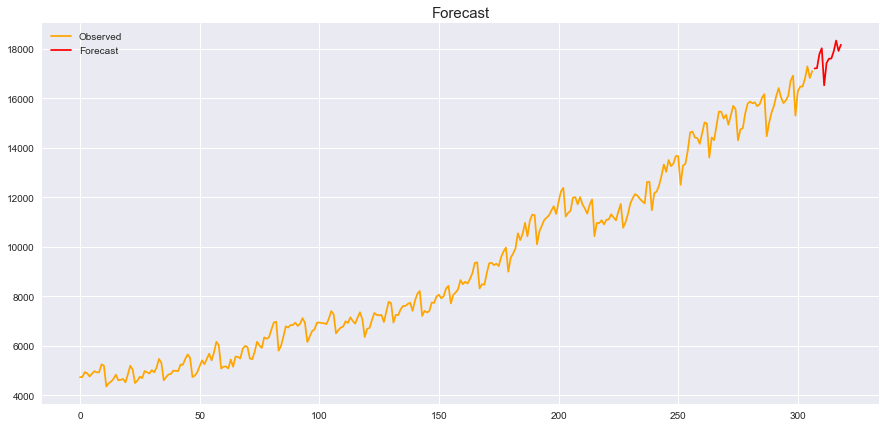

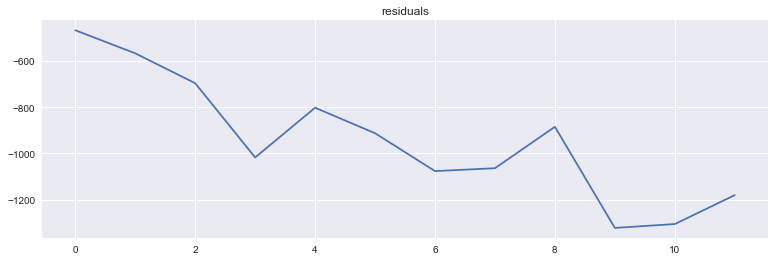

Hypothesis of independency of residuals is rejected
Hypothesis of normality of residuals isn't rejected
Mse on test part = 954458.6515036249


In [161]:
S = Series(train_inventories)
pred = S.search_fit_forecast(lambd=-2, p=3, q=3, P=2, Q=2, forecast_steps=12, 
                             check_residuals=True, test_series=test_inventories)

Теперь предскажем второй временной ряд. Выберем другой критерий проверки на стационарность : Дики-Фуллера (по умолчанию КПСС), другой критерий для выбора оптимальной модели: BIC. Также здесь мы уже не указали lambda для преобразования Бокса-Кокса, поэтому будет подбираться оптимальный.

Dickey—Fuller criterion doesn't reject the hypothesis of non-stationarity, p-value = 0.9983140782609586
-- Variance stabilization --
Dickey—Fuller criterion doesn't reject the hypothesis of non-stationarity, p-value = 0.9594317104109022
-- Differentiation --
Dickey—Fuller criterion rejects the hypothesis of non-stationarity, p-value = 3.779396812309198e-06
-- Start searching --
ARIMA(1, 1, 0)x(1, 0, 0, 12) – BIC:449.8062424592937
ARIMA(1, 1, 0)x(1, 0, 1, 12) – BIC:446.5273260705488
ARIMA(1, 1, 0)x(1, 0, 2, 12) – BIC:352.31058541323534
ARIMA(1, 1, 0)x(2, 0, 0, 12) – BIC:437.1716405729682
ARIMA(1, 1, 0)x(2, 0, 1, 12) – BIC:399.689123377861
ARIMA(1, 1, 0)x(2, 0, 2, 12) – BIC:357.0562909512824
ARIMA(1, 1, 1)x(1, 0, 0, 12) – BIC:321.99019925224405
ARIMA(1, 1, 1)x(1, 0, 1, 12) – BIC:323.29329547616595
ARIMA(1, 1, 1)x(1, 0, 2, 12) – BIC:235.87691776202766
ARIMA(1, 1, 1)x(2, 0, 0, 12) – BIC:317.3061472222523
ARIMA(1, 1, 1)x(2, 0, 1, 12) – BIC:263.91657670450815
ARIMA(1, 1, 1)x(2, 0, 2, 12) – B

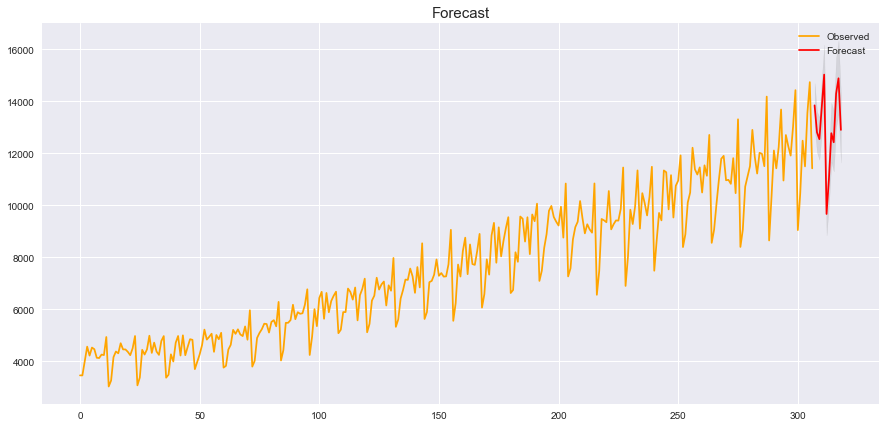

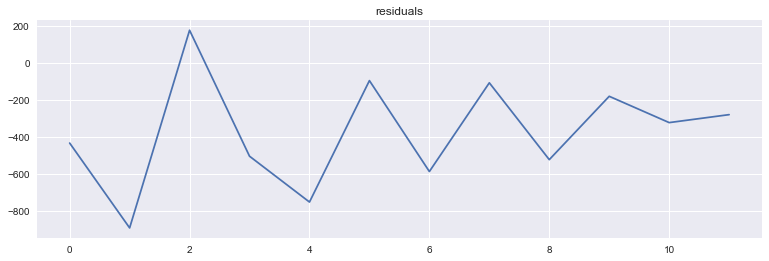

Hypothesis of independency of residuals is rejected
Hypothesis of normality of residuals isn't rejected
Mse on test part = 224091.9815998565


In [168]:
sale_series = Series(train_sales)
pred_sales = sale_series.search_fit_forecast(stat_criterion='adfuller', forecast_steps=12, criterion='bic', 
                             check_residuals=True, test_series=test_sales)

Видим, что в обоих случаях получилось довольно хорошо. На графиках также можно заметить доверительный интервал, правда на первом графике его плоховато видно из-за большого масштаба. 

<br>

Попробуем предсказать первый временной ряд, но уже рассматривая и обучаясь только на последней трети ряда.

Kpss criterion rejects the hypothesis of stationarity, p-value = 0.01
-- Variance stabilization --
Kpss criterion rejects the hypothesis of stationarity, p-value = 0.01
-- Differentiation --
Kpss criterion doesn't reject the hypothesis of stationarity, p-value = 0.1
-- Start searching --
ARIMA(1, 1, 0)x(1, 0, 0, 12) – AIC:-440.6533103150659
ARIMA(1, 1, 0)x(1, 0, 1, 12) – AIC:-449.07208472796714
ARIMA(1, 1, 0)x(1, 0, 2, 12) – AIC:-396.4990110153195
ARIMA(1, 1, 0)x(2, 0, 0, 12) – AIC:-397.30500467210845
ARIMA(1, 1, 0)x(2, 0, 1, 12) – AIC:-395.2716990499059
ARIMA(1, 1, 0)x(2, 0, 2, 12) – AIC:-405.591030991446
ARIMA(1, 1, 1)x(1, 0, 0, 12) – AIC:-438.7586836838389
ARIMA(1, 1, 1)x(1, 0, 1, 12) – AIC:-440.0815295648019
ARIMA(1, 1, 1)x(1, 0, 2, 12) – AIC:-394.1163763046916
ARIMA(1, 1, 1)x(2, 0, 0, 12) – AIC:-396.9037537667094
ARIMA(1, 1, 1)x(2, 0, 1, 12) – AIC:-398.7200663529686
ARIMA(1, 1, 1)x(2, 0, 2, 12) – AIC:-402.43893175876457
ARIMA(1, 1, 2)x(1, 0, 0, 12) – AIC:-443.89010096872556
ARIMA(

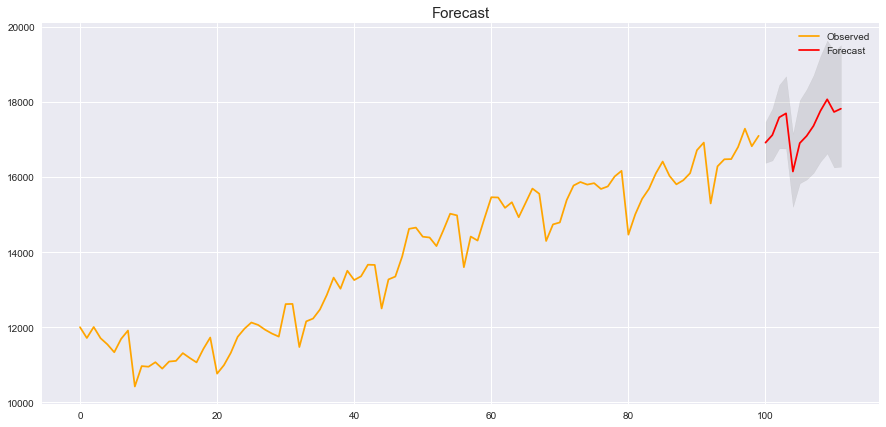

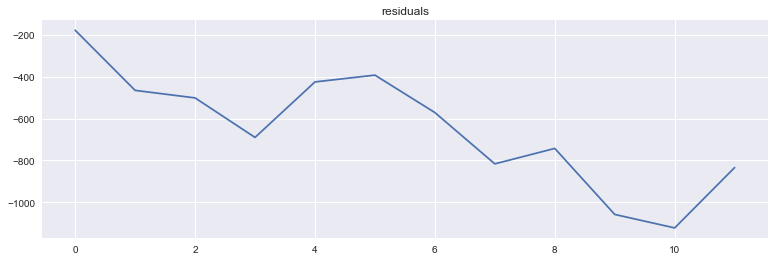

Hypothesis of independency of residuals is rejected
Hypothesis of normality of residuals isn't rejected
Mse on test part = 494097.40712814644


In [163]:
S = Series(train_inventories[-100:])
pred = S.search_fit_forecast(lambd=0, forecast_steps=12, 
                             check_residuals=True, test_series=test_inventories)

Ну и посмотрим визуально на значения предсказанного ряда и истинного.

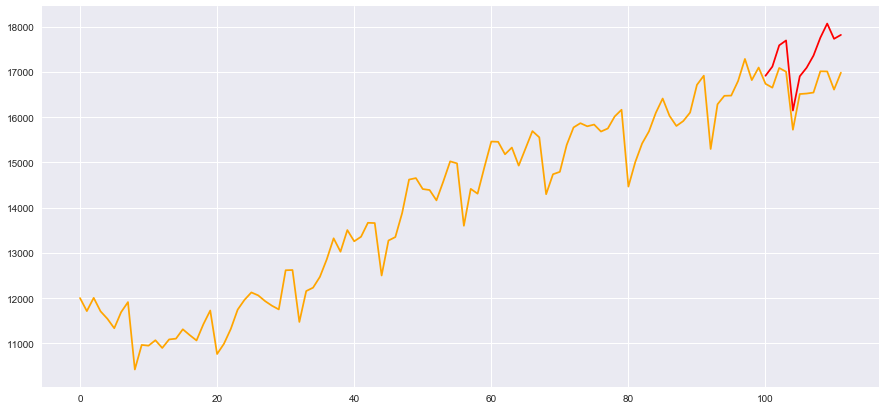

In [167]:
length = len(train_inventories[-100:])
plt.figure(figsize=(15, 7))
plt.plot(np.arange(length + 12), np.hstack((train_inventories[-100:], test_inventories)),
         color='orange',  label='Observed')
plt.plot(np.arange(length, length + 12), pred, color='red',  label='Prediction')
plt.show()